In [ ]:
import cv2 ###  pip install opencv-python  Shift + enter
## pip install opencv-contrib-python    fullpackage

: 

In [4]:
from deepface import DeepFace  ## pip install deepface

In [5]:
img = cv2.imread('boy.jpeg')

In [6]:
import matplotlib.pyplot as plt

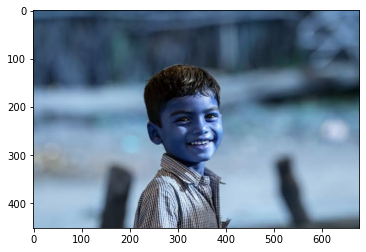

In [7]:
plt.imshow(img) ## BGR

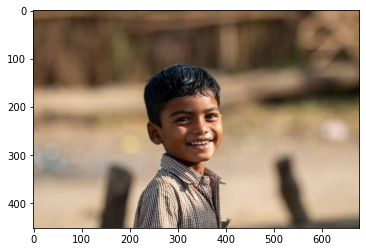

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:33<00:00,  8.43s/it]


In [10]:
predictions

{'emotion': {'angry': 2.067136878336484e-08,
  'disgust': 9.324649866352638e-22,
  'fear': 7.755120157160178e-09,
  'happy': 100.0,
  'sad': 9.362890462938367e-08,
  'surprise': 7.906285626191334e-08,
  'neutral': 1.3304894295670944e-10},
 'dominant_emotion': 'happy',
 'age': 29,
 'gender': 'Woman',
 'race': {'asian': 40.48938041798835,
  'indian': 20.17865719540801,
  'black': 24.68712177123091,
  'white': 0.14579226836693507,
  'middle eastern': 0.07312381929703883,
  'latino hispanic': 14.425932100526344},
 'dominant_race': 'asian'}

In [11]:
type(predictions)

dict

In [12]:
predictions['dominant_emotion']

'happy'

# we are trying to draw a rectangle across the face

In [13]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around the faces
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

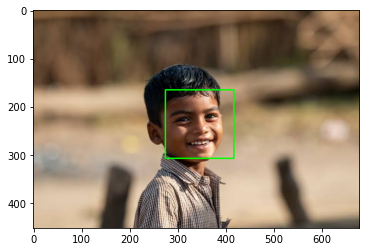

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for
# inserting text on video
cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font, 2,
           (0,0,255),
           2,
           cv2.LINE_4);cv2.putText(img,
           predictions['dominant_race'],
           (100,150),
           font, 2,
           (255,0,0),
           2,
           cv2.LINE_4);


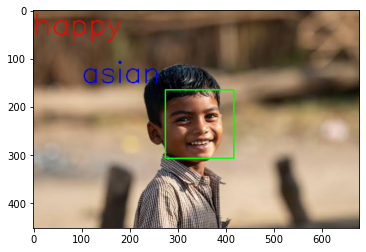

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
img =cv2.imread('neutral.jpeg')

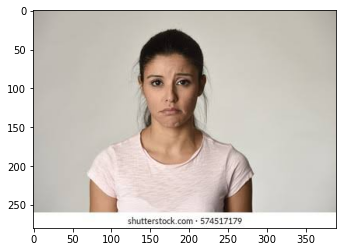

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.30s/it]


In [21]:
predictions

{'emotion': {'angry': 4.279908978332969e-05,
  'disgust': 2.617576768944134e-12,
  'fear': 0.00032971531709335977,
  'happy': 0.003016316259163432,
  'sad': 0.2036703983321786,
  'surprise': 3.1261935262705265e-07,
  'neutral': 99.79294538497925},
 'dominant_emotion': 'neutral',
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 5.005684420805241,
  'indian': 12.131810166347632,
  'black': 1.0653423780406939,
  'white': 27.36092372899793,
  'middle eastern': 17.260995045959653,
  'latino hispanic': 37.17524630875864},
 'dominant_race': 'latino hispanic'}

In [22]:
img =cv2.imread('sad.jpeg')

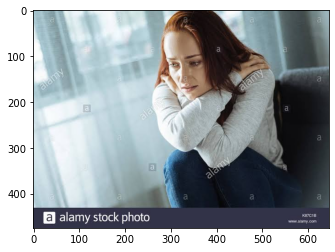

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.48s/it]


In [25]:
predictions

{'emotion': {'angry': 0.0026168701620001254,
  'disgust': 5.963777605286627e-08,
  'fear': 0.6201189380955063,
  'happy': 3.9096484428434635,
  'sad': 95.45414420689012,
  'surprise': 2.3496072267188168e-05,
  'neutral': 0.013444972211009099},
 'dominant_emotion': 'sad',
 'age': 31,
 'gender': 'Man',
 'race': {'asian': 2.0120797142887454,
  'indian': 4.4691810644649195,
  'black': 0.44135888433648535,
  'white': 40.6189244247765,
  'middle eastern': 39.2014993188978,
  'latino hispanic': 13.256952076321593},
 'dominant_race': 'white'}



## Real time video demo for Face Emotion Recognition

In [26]:
import cv2 ###  pip install opencv-python 
## pip install opencv-contrib-python    fullpackage
from deepface import DeepFace  ## pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap =cv2.VideoCapture()
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read() ## read one image from a video
    result = DeepFace.analyze(frame, actions = ['emotion'], enforce_detection=False)
    result = DeepFace.analyze(frame, actions = ['race'])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      #print(faceCascade.empty())
        
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    
    # Draw a rectangle around the faces
    for(x,y,w,h)in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            
            
    font = cv2.FONT_HERSHEY_SIMPLEX
            
            # Use putText() method for
            # inserting text on video
            
    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font, 3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.putText(frame,
                result['dominant_race'],
                (100,150),
                font, 3,
                (255,0,0),
                2,
                cv2.LINE_4)
    cv2.imshow('demo_video',frame)
    
    if cv2.waitKey() & 0xFF == ord('q'):
        break
        
    cap.release()
    cv2.destroyAllWindows()
    


    
    
            
        

            
    


  
    




Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]


TypeError: object of type 'NoneType' has no len()